# Table of Contents

[01. Import Library](#01)<br>

[02. Load Data](#02)<br>

[03. Exploratory Data Analysis (EDA)](#03)<br>

&nbsp;&nbsp;&nbsp;[3.1. Graph](#3.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.1. Use matplotlib](#3.1.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.2. Use plotly_express](#3.1.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.3. Use seaborn](#3.1.3)<br>

&nbsp;&nbsp;&nbsp;[3.2. Others](#3.2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.1. Outliers](#3.2.1)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2.2. Quantitative - Qualitative Features](#3.2.2)<br>


# 01. Import Library<a id='01'></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import pandas_profiling
import plotly_express as px
from scipy import stats
from scipy.stats import norm, skew 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


# 02. Load Data <a id='02'></a>

In [2]:
print("List of files:", os.listdir('/kaggle/input/customer-segmentation-tutorial-in-python'))

# Load data
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
print("\nData length:",df.shape)
print("\nData columns:",df.columns)
print("\nData columns:",df.info())
print("\nData:\n\n",df.head())

List of files: ['Mall_Customers.csv']

Data length: (200, 5)

Data columns: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Data columns: None

Data:

    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16  

# 03. Exploratory Data Analysis (EDA)<a id='03'></a>

In [3]:
# Correlation
df_corr = df.corr()
df_corr

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [4]:
df_corr.style.background_gradient(cmap='coolwarm', axis=None)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [5]:
# Use panda profile report
df.profile_report()

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 3.1. Graphs<a id='3.1'></a>

### 3.1.1. Use matplotlib<a id='3.1.1'></a>

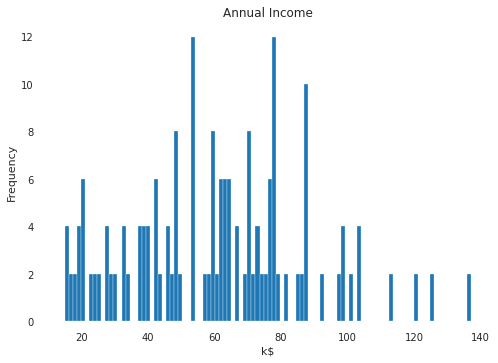

In [6]:
# Use matplotlib

# plt.style.use('ggplot')
plt.hist(df['Annual Income (k$)'], bins = 100)

# Add title and axis names
plt.title('Annual Income')
plt.xlabel('k$')
plt.ylabel('Frequency') 

plt.show()

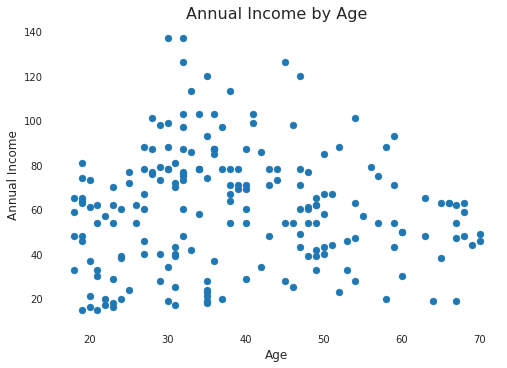

In [7]:
# Scatter Plot
fig, ax = plt.subplots()
ax.scatter(df['Age'], df['Annual Income (k$)'])
plt.ylabel('Annual Income', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.title('Annual Income by Age', fontsize=16)
plt.show()

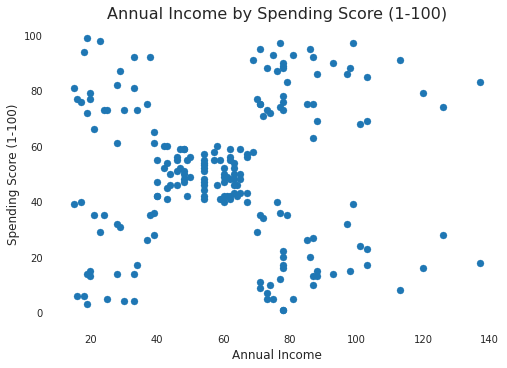

In [8]:
# Scatter Plot
fig, ax = plt.subplots()
ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.title('Annual Income by Spending Score (1-100)', fontsize=16)
plt.show()

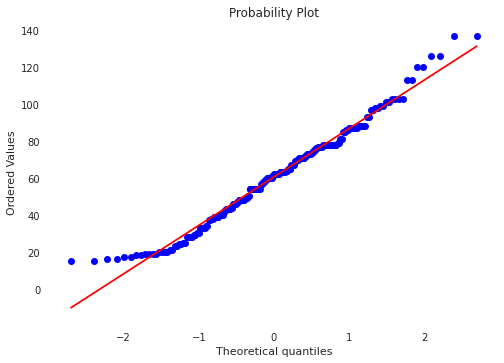

In [9]:
# QQ-plot
fig = plt.figure()
ax = fig.add_subplot()
res = stats.probplot(df['Annual Income (k$)'], plot=plt)
plt.show()

### 3.1.2. Use plotly_express<a id='3.1.2'></a>

In [10]:
# Scatter Plot with color from 2nd variable
px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', color='Age')

In [11]:
# Scatter Plot with color from 2nd variable
px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', color='Gender')

In [12]:
# Box Plot
px.box(df[['Gender', 'Spending Score (1-100)']].sort_values(by='Gender')
       , x='Gender'
       , y='Spending Score (1-100)'
       , color='Gender')

In [13]:
# Box Plot
px.box(df[['Age', 'Spending Score (1-100)']].sort_values(by='Age')
       , x='Age'
       , y='Spending Score (1-100)'
       , color='Age')

In [14]:
# Box Plot
px.box(df[['Age', 'Annual Income (k$)']].sort_values(by='Age')
       , x='Age'
       , y='Annual Income (k$)'
       , color='Age')

### 3.1.3. Use seaborn<a id='3.1.3'></a>

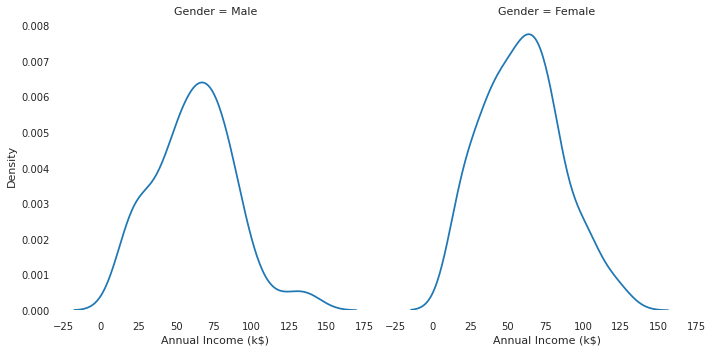

In [15]:
# Plot the distribution
sns.displot(df, x="Annual Income (k$)", col="Gender", kind="kde")

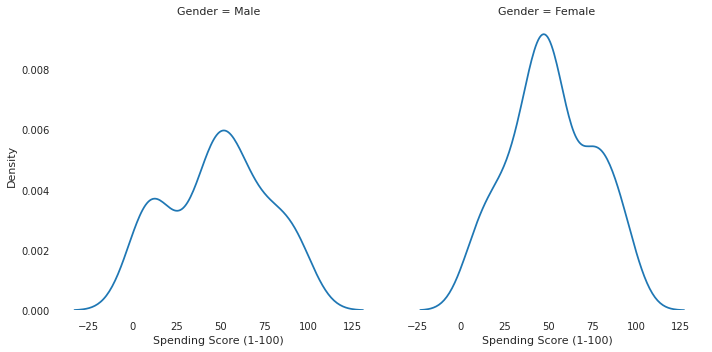

In [16]:
# Plot the distribution
sns.displot(df, x="Spending Score (1-100)", col="Gender", kind="kde")